In [ ]:
#https://altair-viz.github.io/getting_started/starting.html

In [2]:
import pandas as pd
import numpy as np

In [3]:
import altair as alt

In [4]:
#import data from a csv
wnba_pbp = pd.read_csv('/Users/maddy/Desktop/cse_512/A3/wnba_pbp.csv')

In [7]:
wnba_pbp.head()

,game_play_number,id,sequence_number,type_id,type_text,text,away_score,home_score,period_number,period_display_value,...,end_half_seconds_remaining,end_game_seconds_remaining,period,lag_qtr,lag_half,coordinate_x,coordinate_y,game_date,game_date_time,type_abbreviation
0,1,4015785744,4,615,Jumpball,A'ja Wilson vs. Jonquel Jones (Alysha Clark ga...,0,0,1,1st Quarter,...,1200.0,2400.0,1,NaN,NaN,-2.147484e+08,-214748365,2023-10-18,2023-10-18 20:00:00,NaN
1,2,4015785747,7,110,Driving Layup Shot,A'ja Wilson makes driving layup (Cayla George ...,2,0,1,1st Quarter,...,1157.0,2357.0,1,1.0,1.0,-3.875000e+01,-2,2023-10-18,2023-10-18 20:00:00,NaN
2,3,4015785749,9,90,Out of Bounds - Bad Pass Turnover,Courtney Vandersloot out of bounds bad pass tu...,2,0,1,1st Quarter,...,1134.0,2334.0,1,1.0,1.0,3.975000e+01,12,2023-10-18,2023-10-18 20:00:00,NaN
3,4,40157857410,10,120,Turnaround Hook Shot,Alysha Clark makes 4-foot two point shot,4,0,1,1st Quarter,...,1120.0,2320.0,1,1.0,1.0,-3.875000e+01,-1,2023-10-18,2023-10-18 20:00:00,NaN
4,5,40157857411,11,92,Jump Shot,Betnijah Laney makes three point jumper (Court...,4,3,1,1st Quarter,...,1106.0,2306.0,1,1.0,1.0,4.175000e+01,23,2023-10-18,2023-10-18 20:00:00,NaN


In [8]:
# Assuming wnba_pbp is your DataFrame
column_names = wnba_pbp.columns
print(column_names)

# Print a specific range of rows, for example, rows 50 to 150
print(wnba_pbp['type_text'][50:150])


Index(['game_play_number', 'id', 'sequence_number', 'type_id', 'type_text',
       'text', 'away_score', 'home_score', 'period_number',
       'period_display_value', 'clock_display_value', 'scoring_play',
       'score_value', 'team_id', 'athlete_id_1', 'athlete_id_2',
       'athlete_id_3', 'wallclock', 'shooting_play', 'coordinate_x_raw',
       'coordinate_y_raw', 'game_id', 'season', 'season_type', 'home_team_id',
       'home_team_name', 'home_team_mascot', 'home_team_abbrev',
       'home_team_name_alt', 'away_team_id', 'away_team_name',
       'away_team_mascot', 'away_team_abbrev', 'away_team_name_alt',
       'game_spread', 'home_favorite', 'game_spread_available',
       'home_team_spread', 'qtr', 'time', 'clock_minutes', 'clock_seconds',
       'home_timeout_called', 'away_timeout_called', 'half', 'game_half',
       'lead_qtr', 'lead_half', 'start_quarter_seconds_remaining',
       'start_half_seconds_remaining', 'start_game_seconds_remaining',
       'end_quarter_seconds_

In [23]:
import matplotlib.pyplot as plt

# record shooting fouls only, regular season only
subdata = wnba_pbp[(wnba_pbp['type_text'] == "Shooting Foul") & (wnba_pbp['season_type'] == 2)]
subdata = subdata[['game_date', 'clock_display_value', 'period_number', 'text', 'coordinate_x', 'coordinate_y', 'coordinate_x_raw', 'coordinate_y_raw', 'athlete_id_1','athlete_id_2']]

print(subdata)

         game_date clock_display_value  period_number  \
7442    2023-09-10                5:57              1   
7451    2023-09-10                5:11              1   
7463    2023-09-10                3:42              1   
7475    2023-09-10                2:30              1   
7512    2023-09-10                9:32              2   
7530    2023-09-10                7:38              2   
7558    2023-09-10                4:28              2   
7565    2023-09-10                4:03              2   
7573    2023-09-10                3:19              2   
7579    2023-09-10                2:54              2   
7594    2023-09-10                1:36              2   
7600    2023-09-10                1:06              2   
7626    2023-09-10                7:48              3   
7640    2023-09-10                6:06              3   
7644    2023-09-10                5:52              3   
7666    2023-09-10                3:17              3   
7694    2023-09-10             

In [10]:
#the horizontal axis was actually flipped, so flip it back by changing x coordinates to 50-x
subdata['flipped_x'] = 50 - subdata['coordinate_x_raw']

In [11]:
# Create a DataFrame with the coordinates of the four points
court_coords = pd.DataFrame({
    'x': [0, 0, 50, 50, 0],   # x-coordinates of the four points
    'y': [90, -4.75, 90, -4.75, 90]  # y-coordinates of the four points
})

# Create a DataFrame with the coordinates of the horizontal lines
horizontal_lines = pd.DataFrame({
    'y': [-4.75, 43]  # y-coordinates of the horizontal lines
})

# Draw the horizontal lines using mark_rule()
horizontal_lines_chart = alt.Chart(horizontal_lines).mark_rule(color='black', strokeWidth=2.5, strokeOpacity=1).encode(
    y='y:Q'
)

#court is 50 feet wide and 94 feet long. basket located at approximately (25,0)
# Draw the basketball court outline rectangle using mark_line()
court_rect = alt.Chart(court_coords).mark_line(color='black', strokeWidth=2.5, strokeOpacity=1).encode(
    x='x:Q',
    y='y:Q'
)

# Create a DataFrame with the center point of the circle
circle_center = pd.DataFrame({
    'x': [25],  # x-coordinate of the center point
    'y': [43]   # y-coordinate of the center point
})

#center court circle 12 feet in diameter
# Draw the circle using mark_point() with shape='circle' and filled=False
circle_chart = alt.Chart(circle_center).mark_point(shape='circle', size=144*60, color='black', opacity=1, filled=False).encode(
    x='x:Q',
    y='y:Q'
)

# Create a DataFrame with the center point of the circle
basket_center = pd.DataFrame({
    'x': [25],  # x-coordinate of the center point
    'y': [0]   # y-coordinate of the center point
})

#center court circle 12 feet in diameter
# Draw the circle using mark_point() with shape='circle' and filled=False
basket_chart = alt.Chart(basket_center).mark_point(shape='circle', size=144, color='black', opacity=1, filled=False).encode(
    x='x:Q',
    y='y:Q'
)

# Create a DataFrame with the center point of the circle
basket_center2 = pd.DataFrame({
    'x': [25],  # x-coordinate of the center point
    'y': [85.25]   # y-coordinate of the center point
})

#center court circle 12 feet in diameter
# Draw the circle using mark_point() with shape='circle' and filled=False
basket_chart2 = alt.Chart(basket_center2).mark_point(shape='circle', size=144, color='black', opacity=1, filled=False).encode(
    x='x:Q',
    y='y:Q'
)

# Define the vertical lines coordinates
vertical_lines_data = pd.DataFrame({
    'x': [3.75, 46.25],
    'y_start': [-4.75, -4.75],
    'y_end': [1.25, 1.25]
})

vertical_lines = alt.Chart(vertical_lines_data).mark_rule(color='black', strokeWidth=2).encode(
    x=alt.X('x:Q'),
    y=alt.Y('y_start:Q'),
    y2=alt.Y2('y_end:Q')
)

# Define the backboard lines coordinates
horizontal_lines_data = pd.DataFrame({
    'y': [86, -0.75],
    'x_start': [22, 22],
    'x_end': [28, 28]
})

horizontal_lines = alt.Chart(horizontal_lines_data).mark_rule(color='black', strokeWidth=2.8).encode(
    y=alt.Y('y:Q'),
    x=alt.X('x_start:Q'),
    x2=alt.X2('x_end:Q')
)

# Define the free throw lines coordinates
horizontal_lines_data2 = pd.DataFrame({
    'y': [14.25, 71],
    'x_start': [19, 19],
    'x_end': [31, 31]
})

horizontal_lines2 = alt.Chart(horizontal_lines_data2).mark_rule(color='black', strokeWidth=2.5).encode(
    y=alt.Y('y:Q'),
    x=alt.X('x_start:Q'),
    x2=alt.X2('x_end:Q')
)

# Define the vertical lines coordinates
vertical_lines_data2 = pd.DataFrame({
    'x': [3.75, 46.25],
    'y_start': [90, 90],
    'y_end': [84, 84]
})

vertical_lines2 = alt.Chart(vertical_lines_data2).mark_rule(color='black', strokeWidth=2).encode(
    x=alt.X('x:Q'),
    y=alt.Y('y_start:Q'),
    y2=alt.Y2('y_end:Q')
)

# Define the coordinates for the two free throw lanes
vertical_lines_data3 = pd.DataFrame({
    'x': [19, 31],
    'y_start': [-4.75, -4.75],
    'y_end': [14.25, 14.25]
})

vertical_lines3 = alt.Chart(vertical_lines_data3).mark_rule(color='black', strokeWidth=2).encode(
    x=alt.X('x:Q'),
    y=alt.Y('y_start:Q'),
    y2=alt.Y2('y_end:Q')
)

# Define the coordinates for the two free throw lanes
vertical_lines_data4 = pd.DataFrame({
    'x': [19, 31],
    'y_start': [90, 90],
    'y_end': [71, 71]
})

vertical_lines4 = alt.Chart(vertical_lines_data4).mark_rule(color='black', strokeWidth=2).encode(
    x=alt.X('x:Q'),
    y=alt.Y('y_start:Q'),
    y2=alt.Y2('y_end:Q')
)

# Create a DataFrame with the center point of the circle
circle_center2 = pd.DataFrame({
    'x': [25],  # x-coordinate of the center point
    'y': [71]   # y-coordinate of the center point
})

# free throw circles
# Draw the circle using mark_point() with shape='circle' and filled=False
circle_chart2 = alt.Chart(circle_center2).mark_point(shape='circle', size=144*42, color='black', opacity=1, filled=False).encode(
    x='x:Q',
    y='y:Q'
)

# Create a DataFrame with the center point of the circle
circle_center3 = pd.DataFrame({
    'x': [25],  # x-coordinate of the center point
    'y': [15]   # y-coordinate of the center point
})

# free throw circles
# Draw the circle using mark_point() with shape='circle' and filled=False
circle_chart3 = alt.Chart(circle_center3).mark_point(shape='circle', size=144*42, color='black', opacity=1, filled=False).encode(
    x='x:Q',
    y='y:Q'
)

# Define the angle range for the arc (in radians)
theta = np.linspace(0, np.pi, 100)

# Calculate the x and y coordinates of the arc
arc_x = 25 + 21.25 * np.cos(theta)
arc_y = 0.9 + 21.25 * np.sin(theta)

# Create a DataFrame to hold the arc coordinates
arc_data = pd.DataFrame({'x': arc_x, 'y': arc_y})

# Draw the arc
arc = alt.Chart(arc_data).mark_line(color='black').encode(
    x=alt.X('x:Q'),
    y=alt.Y('y:Q')
)

# Define the angle range for the arc (in radians)
theta2 = np.linspace(np.pi, 2*np.pi, 100)

# Calculate the x and y coordinates of the arc
arc_x2 = 25 + 21.25 * np.cos(theta2)
arc_y2 = 85.1 + 21.25 * np.sin(theta2)

# Create a DataFrame to hold the arc coordinates
arc_data2 = pd.DataFrame({'x': arc_x2, 'y': arc_y2})

# Draw the arc
arc2 = alt.Chart(arc_data2).mark_line(color='black').encode(
    x=alt.X('x:Q'),
    y=alt.Y('y:Q')
)

# Define dropdown selection
text_dropdown = alt.selection_single(
    name='Select',
    fields=['text'],
    bind=alt.binding_select(options=subdata['text'].unique().tolist())
)

# Base chart with dropdown filter
base_chart = alt.Chart(subdata).mark_circle(size=80, opacity=0.2).encode(
    x=alt.X('flipped_x', scale=alt.Scale(domain=[0, 50]), title='Horizontal Court Location'),
    y=alt.Y('coordinate_y_raw', scale=alt.Scale(domain=[-3, 90]), title='Vertical Court Location'),
    tooltip=['game_date','period_number','clock_display_value','text']
).add_selection(
    text_dropdown
).transform_filter(
    text_dropdown
)


# Display plot to scale
#if we adjust the size of the plot the size of the plot points and court lines may also need to be adjusted
shot_plot = (circle_chart + horizontal_lines_chart + court_rect + base_chart+ basket_chart + basket_chart2 + vertical_lines + vertical_lines2 + arc + arc2 + horizontal_lines + horizontal_lines2 + vertical_lines3 + vertical_lines4 + circle_chart2 + circle_chart3).properties(
    title='WNBA Shooting Fouls 2023',
    width=400,  # Adjust width as needed
    height=800  #ratio should be 2:1 (or 1:2 idk)
).configure_axis(
    # ticks=False,
    # labels=False,
    # title=None
).configure_axisX(
    grid=False  # Remove gridlines from the x-axis
).configure_axisY(
    grid=False  # Remove gridlines from the y-axis
)


# Show plot
shot_plot


/opt/anaconda3/lib/python3.7/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/opt/anaconda3/lib/python3.7/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.LayerChart(...)

In [12]:
# Calculate counts of each text value
text_counts = subdata['text'].value_counts().reset_index(name='counts')

# Display the counts
text_counts

,index,counts
0,Natasha Howard shooting foul,69
1,Aliyah Boston shooting foul,61
2,Rhyne Howard shooting foul,60
3,Ezi Magbegor shooting foul,58
4,Michaela Onyenwere shooting foul,54
...,...,...
147,Jennie Simms shooting foul,1
148,Liz Dixon shooting foul,1
149,Arella Guirantes shooting foul,1
150,Aerial Powers shooting foul,1


In [13]:
import pandas as pd

# Assuming your DataFrame is named 'subdata'
subdata['distance_from_basket'] = ((subdata['coordinate_x_raw'] - 25)**2 + (subdata['coordinate_y_raw'] - 0)**2)**0.5

# Filter shots with distance greater than 22.15
shots_outside_three_point = subdata[subdata['distance_from_basket'] > 22.1]

# Display shots outside the three-point arc
print(shots_outside_three_point)


         game_date clock_display_value  period_number  \
7775    2023-09-10                3:23              4   
7976    2023-09-10                2:33              2   
8646    2023-09-10                5:04              1   
9649    2023-09-10               0:0.1              3   
11439   2023-09-08                4:42              2   
...            ...                 ...            ...   
100486  2023-05-20                7:50              4   
101823  2023-05-19                5:48              1   
101896  2023-05-19                8:00              2   
101918  2023-05-19                5:38              2   
102116  2023-05-19                5:52              4   

                                    text  coordinate_x  coordinate_y  \
7775     Danielle Robinson shooting foul         31.75            21   
7976             Sika Kone shooting foul        -43.75            23   
8646         Natasha Cloud shooting foul        -30.75           -21   
9649        Nneka Ogwumike 

In [22]:
#three point shooting foul chart
# Define dropdown selection
text_dropdown2 = alt.selection_single(
    name='Select',
    fields=['text'],
    bind=alt.binding_select(options=shots_outside_three_point['text'].unique().tolist())
)

# Base chart with dropdown filter
base_chart2 = alt.Chart(shots_outside_three_point).mark_circle(size=80, opacity=0.2, color="red").encode(
    x=alt.X('flipped_x', scale=alt.Scale(domain=[0, 50]), title='Horizontal Court Location'),
    y=alt.Y('coordinate_y_raw', scale=alt.Scale(domain=[-3, 90]), title='Vertical Court Location'),
    tooltip=['game_date','period_number','clock_display_value','text']
).add_selection(
    text_dropdown
).transform_filter(
    text_dropdown
)


# Display plot to scale
#if we adjust the size of the plot the size of the plot points and court lines may also need to be adjusted
shot_plot2 = (circle_chart + horizontal_lines_chart + court_rect + base_chart2+ basket_chart + basket_chart2 + vertical_lines + vertical_lines2 + arc + arc2 + horizontal_lines + horizontal_lines2 + vertical_lines3 + vertical_lines4 + circle_chart2 + circle_chart3).properties(
    title='WNBA Shooting Fouls 2023',
    width=400,  # Adjust width as needed
    height=800  #ratio should be 2:1 (or 1:2 idk)
).configure_axis(
    # ticks=False,
    # labels=False,
    # title=None
).configure_axisX(
    grid=False  # Remove gridlines from the x-axis
).configure_axisY(
    grid=False  # Remove gridlines from the y-axis
)


# Show plot
shot_plot2

alt.LayerChart(...)

In [21]:
# Calculate counts of each text value
text_counts2 = shots_outside_three_point['text'].value_counts().reset_index(name='counts')

# Display the counts
text_counts2


import pandas as pd

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Now print the DataFrame
print(text_counts2)


                                     index  counts
0              Rebecca Allen shooting foul       5
1              Erica Wheeler shooting foul       4
2              Natasha Cloud shooting foul       4
3                A'ja Wilson shooting foul       3
4          Danielle Robinson shooting foul       3
5         Michaela Onyenwere shooting foul       3
6             Diamond Miller shooting foul       3
7             Betnijah Laney shooting foul       3
8                  Kia Nurse shooting foul       2
9           Natisha Hiedeman shooting foul       2
10             Rachel Banham shooting foul       2
11               Jewell Loyd shooting foul       2
12            Kahleah Copper shooting foul       2
13                Lexie Hull shooting foul       2
14             Jordin Canada shooting foul       2
15           Sabrina Ionescu shooting foul       2
16          Monique Billings shooting foul       2
17             Azura Stevens shooting foul       2
18        DiJonai Carrington sh

In [41]:
# Find row with largest "distance from basket"
row_with_largest_distance = subdata.loc[subdata['distance_from_basket'].idxmax()]

# Display row with largest "distance from basket"
print(row_with_largest_distance)


game_date                                2023-09-07
clock_display_value                            2:41
period_number                                     4
text                    Jordin Canada shooting foul
coordinate_x                                 -13.75
coordinate_y                                     19
coordinate_x_raw                                 44
coordinate_y_raw                                 28
flipped_x                                         6
distance_from_basket                        33.8378
Name: 11985, dtype: object


In [39]:
shot_plot.save('foul_plot.html')

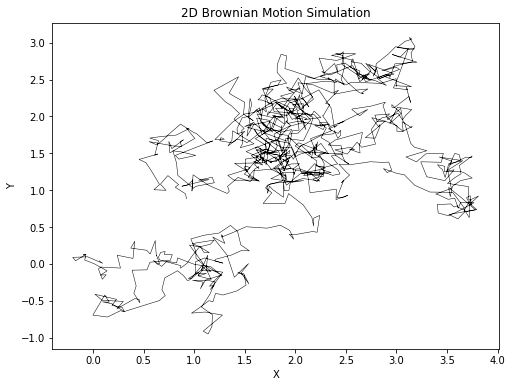

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate 2D Brownian motion
def brownian_motion_2d(num_steps, step_size):
    # Generate random steps in x and y directions
    dx = np.random.normal(0, step_size, num_steps)
    dy = np.random.normal(0, step_size, num_steps)
    
    # Integrate steps to get positions
    x_positions = np.cumsum(dx)
    y_positions = np.cumsum(dy)
    
    return x_positions, y_positions

# Set parameters
num_steps = 1000  # Number of steps
step_size = 0.1   # Step size

# Simulate Brownian motion
x_positions, y_positions = brownian_motion_2d(num_steps, step_size)

# Plot Brownian motion
plt.figure(figsize=(8, 6))
plt.plot(x_positions, y_positions, color='black', linewidth=0.5)
plt.title('2D Brownian Motion Simulation')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(False)  # Remove gridlines
plt.show()


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


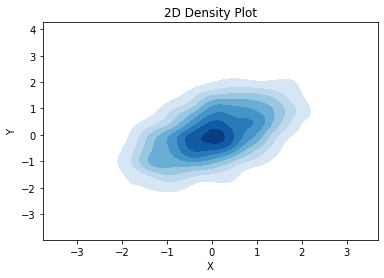

In [57]:
import seaborn as sns
import numpy as np

# Generate bivariate normal data
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]
data = np.random.multivariate_normal(mean, cov, 1000)

# Plot 2D density plot
sns.kdeplot(data=data, cmap="Blues", shade=True, shade_lowest=False)
plt.title('2D Density Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
